In [96]:
import pysam
import pandas as pd
import matplotlib.pyplot as plt

In [97]:
fetch_df = pd.read_csv('interesting_genes.bed', sep='\t', header=None, names=['chr', 'start', 'stop', 'gene'])

In [98]:
fetch_df

,chr,start,stop,gene
0,chr17,39688094,39728658,ERBB2
1,chr17,43044295,43170327,BRCA1
2,chr13,32315508,32400268,BRCA2
3,chr11,125625136,125681124,CHEK1
4,chr22,28687743,28741834,CHEK2
5,chr7,55019017,55211628,EGFR
6,chr17,39688094,39728658,ERBB2
7,chr8,38411143,38468635,FGFR1
8,chr10,121478330,121598458,FGFR2
9,chr4,1793293,1808867,FGFR3


In [99]:
#pysam.index("../WES-normal.bam")

In [113]:
samfile = pysam.AlignmentFile('../WES-normal.bam', 'rb')
genes_bam = pysam.AlignmentFile('../genes.bam', 'wb', template=samfile)

i = 0
d = []

for index, gene in fetch_df.iterrows():
    print(gene['gene'])
    for read in samfile.fetch(gene['chr'], gene['start'], gene['stop']):
        genes_bam.write(read)
        if i < 21:
            #print(read)
            i+=1
    for pileupcolumn in samfile.pileup(gene['chr'], gene['start'], gene['stop']):
        d.append(
                {
                    'Position': pileupcolumn.pos,
                    'Read Count': pileupcolumn.n,
                    'Chromosome': gene['chr'],
                    'Gene': gene['gene']
                }
            )

df_normal = pd.DataFrame(d)


genes_bam.close()
samfile.close()

ERBB2
BRCA1
BRCA2
CHEK1
CHEK2
EGFR
ERBB2
FGFR1
FGFR2
FGFR3
MET
MTAP
MDM2
NF1
NTRK1
PALB2
RB1
STK11
TSC1
TSC2
TP53
CDKN2A


In [114]:
df_normal

,Position,Read Count,Chromosome,Gene
0,39687957,1,chr17,ERBB2
1,39687958,1,chr17,ERBB2
2,39687959,1,chr17,ERBB2
3,39687960,1,chr17,ERBB2
4,39687961,1,chr17,ERBB2
...,...,...,...,...
1017954,21995383,2,chr9,CDKN2A
1017955,21995384,2,chr9,CDKN2A
1017956,21995385,2,chr9,CDKN2A
1017957,21995386,2,chr9,CDKN2A


In [115]:
#pysam.index("../WES-tumor.bam")

In [116]:
samfile = pysam.AlignmentFile('../WES-tumor.bam', 'rb')
genes_bam = pysam.AlignmentFile('../genes_tumor.bam', 'wb', template=samfile)

i = 0
d = []

for index, gene in fetch_df.iterrows():
    print(gene['gene'])
    for read in samfile.fetch(gene['chr'], gene['start'], gene['stop']):
        genes_bam.write(read)

        ############
        if i < 21:
            #print(read)
            i+=1

    #############
    
    for pileupcolumn in samfile.pileup(gene['chr'], gene['start'], gene['stop']):
            d.append(
                {
                    'Position': pileupcolumn.pos,
                    'Read Count': pileupcolumn.n,
                    'Chromosome': gene['chr'],
                    'Gene': gene['gene']
                }
            )

df_tumor = pd.DataFrame(d)

genes_bam.close()
samfile.close()

ERBB2
BRCA1
BRCA2
CHEK1
CHEK2
EGFR
ERBB2
FGFR1
FGFR2
FGFR3
MET
MTAP
MDM2
NF1
NTRK1
PALB2
RB1
STK11
TSC1
TSC2
TP53
CDKN2A


In [117]:
df_tumor

,Position,Read Count,Chromosome,Gene
0,39687955,4,chr17,ERBB2
1,39687956,4,chr17,ERBB2
2,39687957,7,chr17,ERBB2
3,39687958,9,chr17,ERBB2
4,39687959,9,chr17,ERBB2
...,...,...,...,...
1000447,21995451,2,chr9,CDKN2A
1000448,21995452,2,chr9,CDKN2A
1000449,21995453,2,chr9,CDKN2A
1000450,21995454,2,chr9,CDKN2A


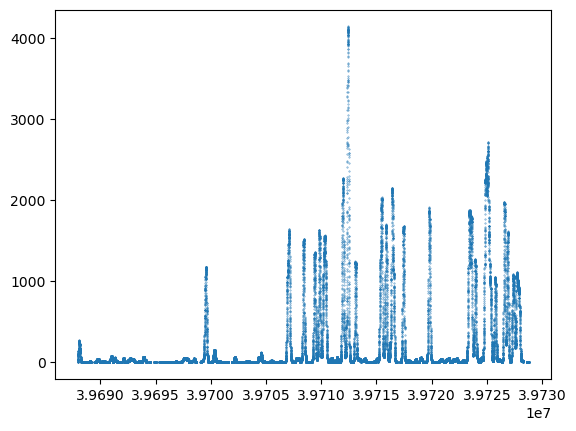

In [118]:
plt.scatter(df_tumor[df_tumor['Gene'] == 'ERBB2']['Position'], df_tumor[df_tumor['Gene'] == 'ERBB2']['Read Count'], alpha=0.5, s=0.1)

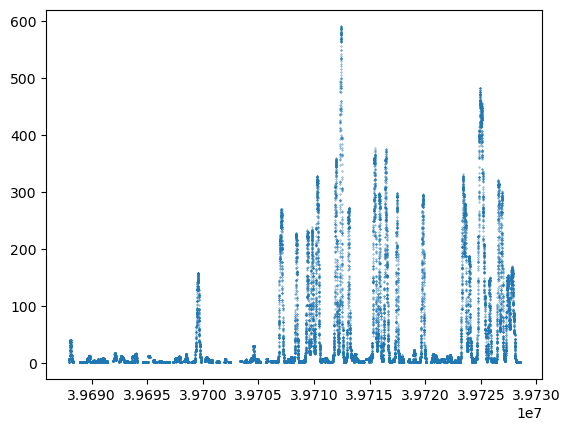

In [119]:
plt.scatter(df_normal[df_normal['Gene'] == 'ERBB2']['Position'], df_normal[df_normal['Gene'] == 'ERBB2']['Read Count'], alpha=0.5, s=0.1)